In [2]:
from scipy.stats import binom
import numpy as np

In [3]:
x = [1] * 9
x = np.array(x)
theta = 0.99
probs = binom.pmf(x, 1, theta)
np.prod(probs)

np.float64(0.9135172474836407)

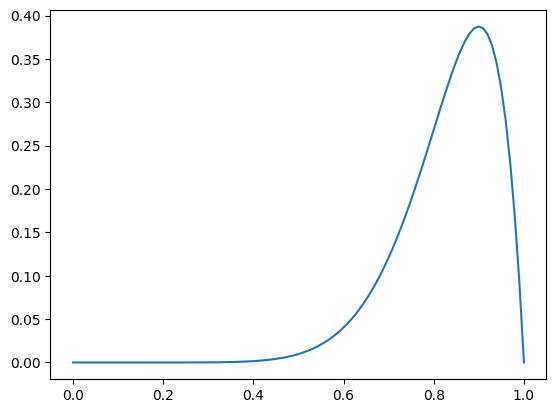

In [4]:
import matplotlib.pyplot as plt
theta = np.linspace(0, 1, 100)
probs = binom.pmf(k = 9, n = 10, p=theta)
plt.plot(theta, probs)

In [5]:
theta[np.argmax(probs)]

np.float64(0.8989898989898991)

In [11]:
np.log(10 ** 2) 

np.float64(4.605170185988092)

In [14]:
np.log(np.exp(10))

np.float64(10.0)

In [18]:
0.9 ** 10

0.3486784401000001

In [9]:
from scipy.stats import expon
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
# datos simulados de expon
l_real = 5
n = 1000
help(expon.rvs)

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(*args, **kwds) method of scipy.stats._continuous_distns.expon_gen instance
    Random variates of given type.

    Parameters
    ----------
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    scale : array_like, optional
        Scale parameter (default=1).
    size : int or tuple of ints, optional
        Defining number of random variates (default is 1).
    random_state : {None, int, `numpy.random.Generator`,
                    `numpy.random.RandomState`}, optional

        If `random_state` is None (or `np.random`), the
        `numpy.random.RandomState` singleton is used.
        If `random_state` is an int, a new ``RandomState`` instance is
        used, seeded with `random_state`.
        If `random_state` is already a ``Generator

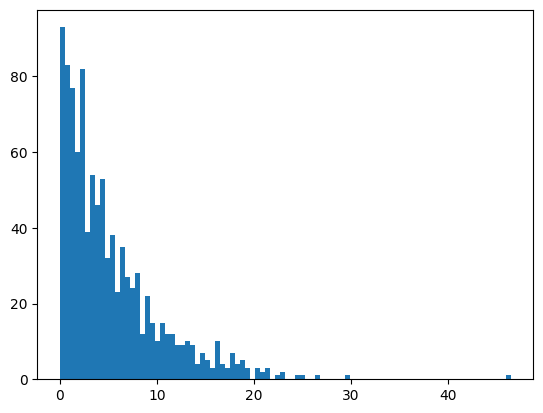

In [3]:
data = expon.rvs(scale=l_real, size=n)
plt.hist(data, bins=90);

In [26]:
# 1. fn de L y l(lambda)
# 2. derivar e igualar a 0, despejar para lambda*

# 1. fn de l(lambda)

# necesito la pdf de exponencial
def log_likelihood(param, x):
    joint_pdf = expon.pdf(x, scale=param)
    log_likelihood = np.sum(np.log(joint_pdf))
    # si vamos a usar minimize, necesitamos log_like negative
    neg_log_likelihood = -log_likelihood
    return neg_log_likelihood


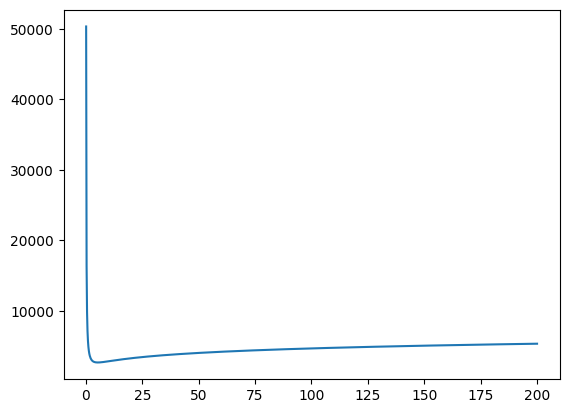

In [28]:
param = np.linspace(0.1, 200, 1000)
# list comprehension
ll = [log_likelihood(p, data) for p in param]
plt.plot(param, ll)

In [32]:
result = minimize(
    log_likelihood,
    x0=1, # initial guess
    args=data,
    method='Nelder-Mead'
)
l_hat = result.x

In [33]:
print(
    f'L hat: {l_hat}, L real: {l_real}'
)

L hat: [5.26523438], L real: 5


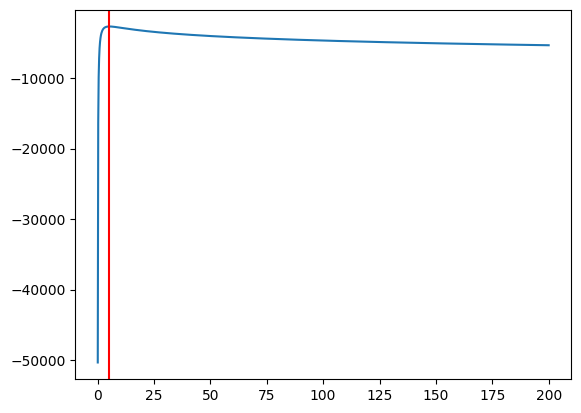

In [36]:
plt.plot(param, -np.array(ll));
plt.axvline(l_hat, color='red')